In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
sub_format = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
print(train.head())
print('\n')
print('\n')
print(test.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  




In [4]:
print(train.shape)
print('\n')
print('\n')
print(test.shape)

(891, 12)




(418, 11)


In [5]:
print(train.isnull().sum())
print('\n')
print('\n')
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64




PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


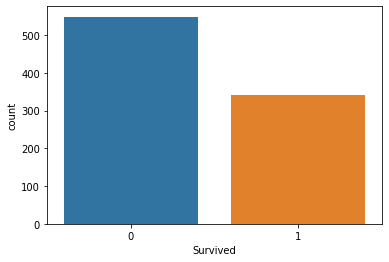

In [6]:
sns.countplot(x='Survived', data=train, label='Survived')
plt.show()

In [7]:
print(train['Survived'].value_counts())

print(train['Survived'].value_counts(normalize=True))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


I'm doing to decide the rows i think are more important and perform EDA to see if they are statistically significant to the target variable

In [8]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

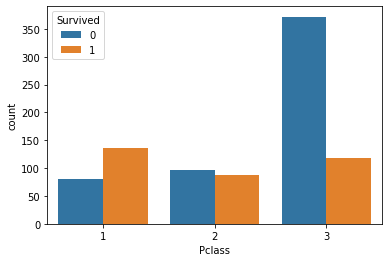

In [9]:
sns.countplot(x='Pclass', hue='Survived', data=train)
plt.show()

It appears passenger class has an influence on a person's ability to survive as third class passengers were most likely to die and the reverse was the case for first class passengers.

next is name, but first sex

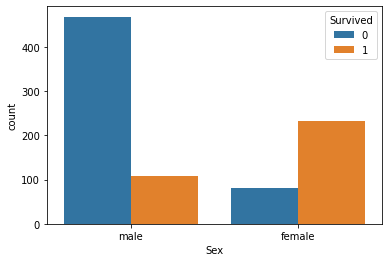

In [10]:
sns.countplot(x='Sex', hue='Survived', data=train)
plt.show()

sex has an obvious bearing on survival probability. The titles of each person introduce further class distinction in societal hierachy as it pertains to sex, so we'll use regex to extract that

In [11]:
combined_data = [train, test]

for table in combined_data:
    table['Prefix'] = table['Name'].str.extract('([A-Za-z]+)\.')

print(train['Prefix'].value_counts())
print(test['Prefix'].value_counts())


Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Prefix, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Prefix, dtype: int64


i want to map this 2 categories to see if they matter in the long run, married people and titled people.
For married people, we encode 1, for unmarried, 2, when we are not sure we input 3
For titled people, we encode 2, everybody else gets a 1. Dona is Spanish for 'Mrs', so we'll note that.

In [12]:
Titled_mapping = {"Mr":1,"Miss":1,"Mrs":1,"Master":1,"Dr":2,"Rev":2,"Major":2,"Mlle":2,"Col":2,"Capt":2,"Sir":2,"Ms":1,"Lady":2,"Mme":2,"Countess":2,"Jonkheer":2,"Don":2, 'Dona':1}
Married_mapping = {"Mr":1,"Miss":2,"Mrs":1,"Master":2,"Dr":3,"Rev":3,"Major":3,"Mlle":3,"Col":3,"Capt":3,"Sir":1,"Ms":2,"Lady":3,"Mme":3,"Countess":3,"Jonkheer":3,"Don":3, 'Dona':1}

for table in combined_data:
    table['Prefix_marital'] = table['Prefix']
    table['Prefix_title'] = table['Prefix']
    table['Prefix_marital'] = table['Prefix_marital'].map(Married_mapping)
    table['Prefix_title'] = table['Prefix_title'].map(Titled_mapping)
    
print(train[['Name', 'Prefix', 'Prefix_marital', 'Prefix_title']].head(10))

                                                Name  Prefix  Prefix_marital  \
0                            Braund, Mr. Owen Harris      Mr               1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...     Mrs               1   
2                             Heikkinen, Miss. Laina    Miss               2   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)     Mrs               1   
4                           Allen, Mr. William Henry      Mr               1   
5                                   Moran, Mr. James      Mr               1   
6                            McCarthy, Mr. Timothy J      Mr               1   
7                     Palsson, Master. Gosta Leonard  Master               2   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)     Mrs               1   
9                Nasser, Mrs. Nicholas (Adele Achem)     Mrs               1   

   Prefix_title  
0             1  
1             1  
2             1  
3             1  
4             1  
5          

let's run some EDA now

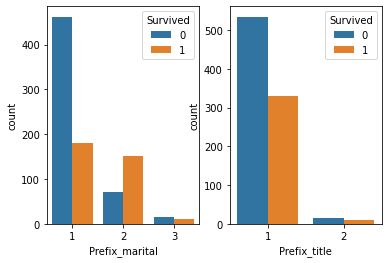

In [13]:
fig, ax = plt.subplots(1, 2)
sns.countplot(x='Prefix_marital', hue='Survived', data=train, ax=ax[0])
sns.countplot(x='Prefix_title', hue='Survived', data=train, ax=ax[1])
plt.show()

Marital Status has more impact than title, but we'll leave both. next up, Age

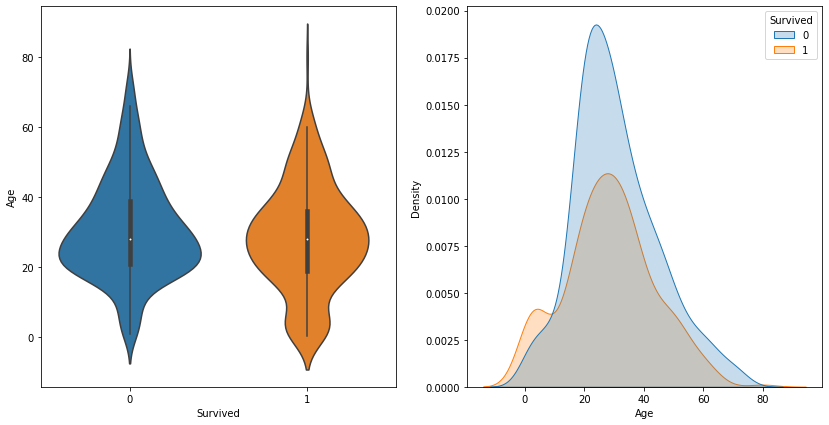

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(14,7))
sns.violinplot(data=train, x='Survived', y='Age', split=True, ax=ax[0])
sns.kdeplot(x='Age', hue='Survived', data=train, shade=True, ax=ax[1])
plt.show()

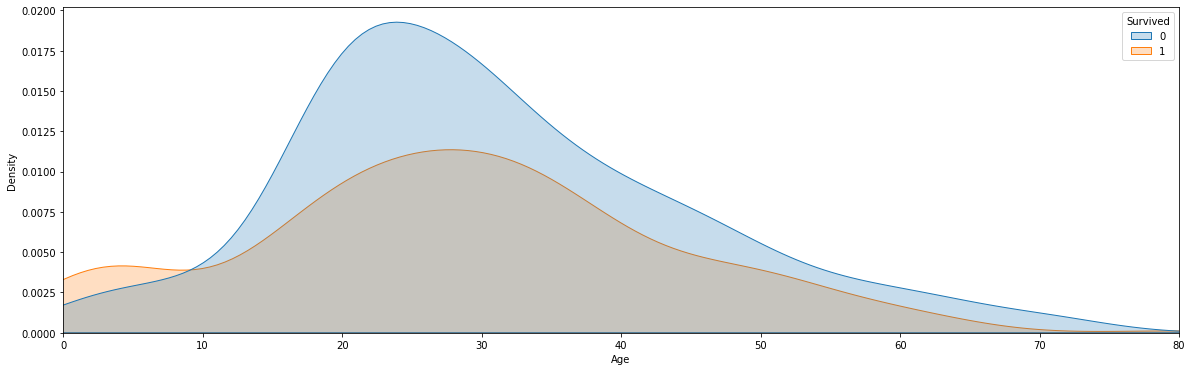

In [15]:
fig = plt.figure(figsize=(20, 6)) 
sns.kdeplot(x='Age', hue='Survived', data=train, shade=True)
plt.xlim(0,train["Age"].max())
plt.show()

It appears age has a large influence but also has a lot of missing values, lets fill this in with respect to the various age groups of the Passenger class, coz we suspect them to have diffrent ranges, and replot

intresting piece of code i just learnt

In [16]:
print(train['Age'].isnull().sum())
print(test['Age'].isnull().sum())
print(train['Pclass'].value_counts())
print(train.groupby('Pclass')['Age'].groups[1])
print(train[['Pclass', 'Age']].head(10))

177
86
3    491
1    216
2    184
Name: Pclass, dtype: int64
Int64Index([  1,   3,   6,  11,  23,  27,  30,  31,  34,  35,
            ...
            853, 856, 857, 862, 867, 871, 872, 879, 887, 889],
           dtype='int64', length=216)
   Pclass   Age
0       3  22.0
1       1  38.0
2       3  26.0
3       1  35.0
4       3  35.0
5       3   NaN
6       1  54.0
7       3   2.0
8       3  27.0
9       2  14.0


In [17]:
for i, avg in zip([1,2,3], [38, 30, 25]):
    class_group = train.groupby('Pclass')['Age'].groups[i]
    train.loc[class_group, 'Age'] = train.loc[class_group, 'Age'].fillna(avg)
print(train['Age'].isnull().sum())

#same for test
for i, avg in zip([1,2,3], [38, 30, 25]):
    class_group = test.groupby('Pclass')['Age'].groups[i]
    test.loc[class_group, 'Age'] = test.loc[class_group, 'Age'].fillna(avg)
print(test['Age'].isnull().sum())

0
0


let's replot

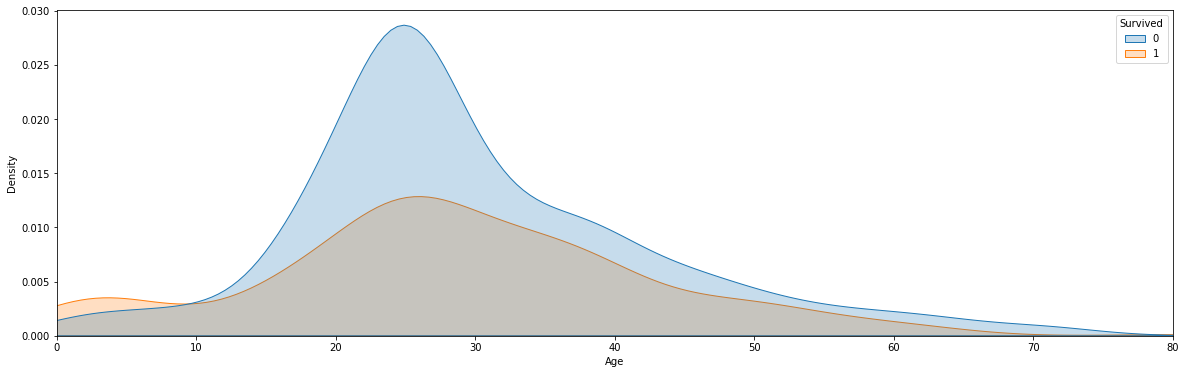

In [18]:
fig = plt.figure(figsize=(20, 6)) 
sns.kdeplot(x='Age', hue='Survived', data=train, shade=True)
plt.xlim(0,train["Age"].max())
plt.show()

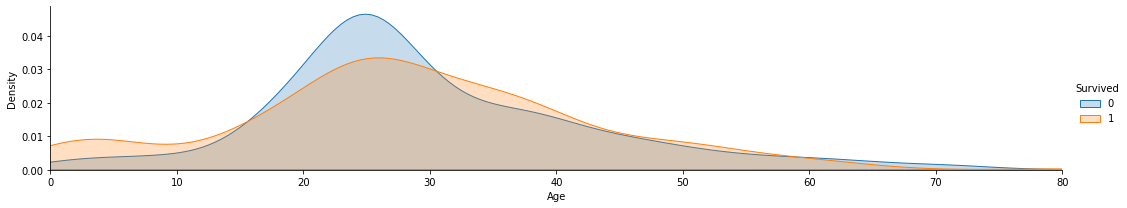

In [19]:
fac = sns.FacetGrid(train,hue = "Survived", aspect = 5)
fac.map(sns.kdeplot,'Age',shade=True)
fac.set(xlim=(0,train["Age"].max()))
fac.add_legend()

Next, family values

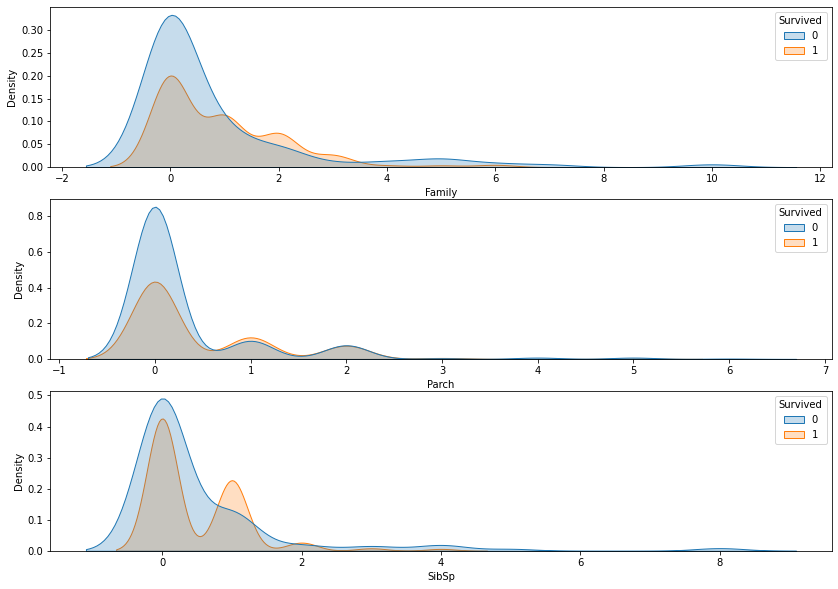

In [20]:
#Agg Sibsp, Parch to Family and plot, also check if the have an effect independently
train['Family'] = train['SibSp'] + train['Parch']
fig, ax = plt.subplots(3, 1, figsize=(14,10))
sns.kdeplot(x='Family', hue='Survived', data=train, shade=True, ax=ax[0])
sns.kdeplot(x='Parch', hue='Survived', data=train, shade=True, ax=ax[1])
sns.kdeplot(x='SibSp', hue='Survived', data=train, shade=True, ax=ax[2])
#sns.countplot(x='Parch', hue='Survived', data='train', ax=ax[2])
plt.show()

intresting, let's leave only family for now

In [21]:
train['Family'].isnull().sum()

0

In [22]:
#same for test
test['Family'] = test['SibSp'] + test['Parch']
test['Family'].isnull().sum()

0

tickets now

In [23]:
train['Ticket'].head(10)

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

nothing concern me for there, next fare

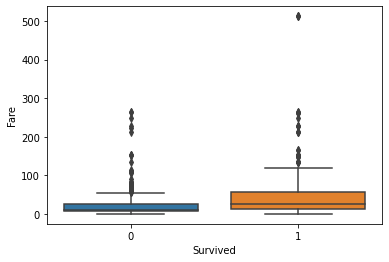

In [24]:
sns.boxplot(x='Survived', y='Fare', data=train)
plt.show()

In [25]:
test['Fare'].isnull().sum()

1

In [26]:
fare_miss = test['Fare'].isnull()
test.corr()['Fare'].transform('abs').sort_values(ascending=False)

Fare              1.000000
Pclass            0.577147
Age               0.350422
Family            0.249924
Parch             0.230046
SibSp             0.171539
Prefix_title      0.078418
Prefix_marital    0.071506
PassengerId       0.008211
Name: Fare, dtype: float64

so, i'll compute the fare by pclass

In [27]:
test.groupby('Pclass')['Fare'].agg({'mean', 'median'})

,median,mean
Pclass,,
1,60.0000,94.280297
2,15.7500,22.202104
3,7.8958,12.459678


In [28]:
#i'll go with median
test.loc[fare_miss]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Prefix_marital,Prefix_title,Family
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S,Mr,1,1,0


In [29]:
test.loc[fare_miss, 'Fare'] = 7.8958
test['Fare'].isnull().sum()

0

based on the median, those that survived paid more than those that died, next, cabin. we'll keep first letter of each cabin and fill in the unknowns with U


In [30]:
train.loc[~train['Cabin'].isnull(), 'Cabin'] = train[~train['Cabin'].isnull()]['Cabin'].str.slice(stop=1)

train.loc[train['Cabin'].isnull(), 'Cabin'] = 'U'

train['Cabin'].value_counts()

U    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [31]:
#for test
test.loc[~test['Cabin'].isnull(), 'Cabin'] = test[~test['Cabin'].isnull()]['Cabin'].str.slice(stop=1)

test.loc[test['Cabin'].isnull(), 'Cabin'] = 'U'

test['Cabin'].value_counts()

U    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

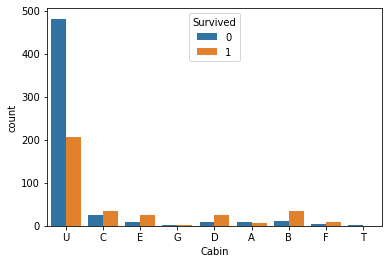

In [32]:
sns.countplot(x='Cabin', hue='Survived', data=train)
plt.show()

we're keeping it, next embarked

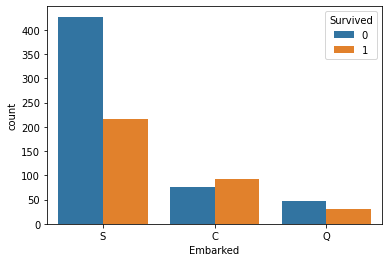

In [33]:
sns.countplot(x='Embarked', hue='Survived', data=train)
plt.show()

good

In [34]:
print(train['Embarked'].isnull().sum())
print(test['Embarked'].isnull().sum())

2
0


In [35]:
them_loss = train['Embarked'].isnull()
train[them_loss]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Prefix,Prefix_marital,Prefix_title,Family
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B,NaN,Miss,2,1,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B,NaN,Mrs,1,1,0


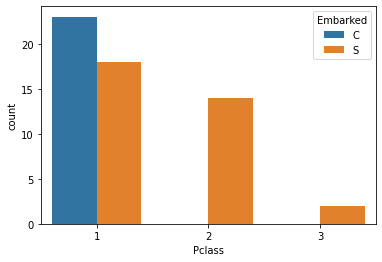

In [36]:
sns.countplot(data=train[(train['Survived']==1) & (train['Sex']=='female') & (train['Age']>=38)], x='Pclass', hue='Embarked')
plt.show()

In [37]:
train.loc[them_loss, 'Embarked'] = 'C'
train['Embarked'].isnull().sum()

0

In [38]:
X = train.iloc[:, 1:].copy()
y = train.iloc[:, 1].copy()

In [39]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
X.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Prefix', 'Prefix_marital', 'Prefix_title',
       'Family'],
      dtype='object')

In [41]:
#let's drop some columns
X.drop(columns=['Survived','Name','SibSp', 'Parch','Ticket','Prefix'], inplace=True)
X.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Prefix_marital,Prefix_title,Family
0,3,male,22.0,7.2500,U,S,1,1,1
1,1,female,38.0,71.2833,C,C,1,1,1
2,3,female,26.0,7.9250,U,S,2,1,0
3,1,female,35.0,53.1000,C,S,1,1,1
4,3,male,35.0,8.0500,U,S,1,1,0


In [42]:
import category_encoders as ce 
ohe = ce.one_hot.OneHotEncoder(use_cat_names=True)
X = ohe.fit_transform(X)
X.head()

,Pclass,Sex_male,Sex_female,Age,Fare,Cabin_U,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_S,Embarked_C,Embarked_Q,Prefix_marital,Prefix_title,Family
0,3,1,0,22.0,7.2500,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1
1,1,0,1,38.0,71.2833,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1
2,3,0,1,26.0,7.9250,1,0,0,0,0,0,0,0,0,1,0,0,2,1,0
3,1,0,1,35.0,53.1000,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1
4,3,1,0,35.0,8.0500,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0


In [43]:
X.drop(columns=['Sex_female', 'Cabin_T', 'Embarked_Q'], inplace=True)
X.head()

,Pclass,Sex_male,Age,Fare,Cabin_U,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Embarked_S,Embarked_C,Prefix_marital,Prefix_title,Family
0,3,1,22.0,7.2500,1,0,0,0,0,0,0,0,1,0,1,1,1
1,1,0,38.0,71.2833,0,1,0,0,0,0,0,0,0,1,1,1,1
2,3,0,26.0,7.9250,1,0,0,0,0,0,0,0,1,0,2,1,0
3,1,0,35.0,53.1000,0,1,0,0,0,0,0,0,1,0,1,1,1
4,3,1,35.0,8.0500,1,0,0,0,0,0,0,0,1,0,1,1,0


In [44]:
print(test.shape)
print(test.iloc[0])
print(test.iloc[417])

(418, 15)
PassengerId                    892
Pclass                           3
Name              Kelly, Mr. James
Sex                           male
Age                           34.5
SibSp                            0
Parch                            0
Ticket                      330911
Fare                        7.8292
Cabin                            U
Embarked                         Q
Prefix                          Mr
Prefix_marital                   1
Prefix_title                     1
Family                           0
Name: 0, dtype: object
PassengerId                           1309
Pclass                                   3
Name              Peter, Master. Michael J
Sex                                   male
Age                                   25.0
SibSp                                    1
Parch                                    1
Ticket                                2668
Fare                               22.3583
Cabin                                    U
Embarked    

In [45]:
test_sub = test.copy()
test_sub.drop(columns=['PassengerId','Name','SibSp', 'Parch','Ticket','Prefix'], inplace=True)
test_sub = ohe.transform(test_sub)
test_sub.head()

,Pclass,Sex_male,Sex_female,Age,Fare,Cabin_U,Cabin_C,Cabin_E,Cabin_G,Cabin_D,Cabin_A,Cabin_B,Cabin_F,Cabin_T,Embarked_S,Embarked_C,Embarked_Q,Prefix_marital,Prefix_title,Family
0,3,1,0,34.5,7.8292,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0
1,3,0,1,47.0,7.0000,1,0,0,0,0,0,0,0,0,1,0,0,1,1,1
2,2,1,0,62.0,9.6875,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0
3,3,1,0,27.0,8.6625,1,0,0,0,0,0,0,0,0,1,0,0,1,1,0
4,3,0,1,22.0,12.2875,1,0,0,0,0,0,0,0,0,1,0,0,1,1,2


In [46]:
test_sub.drop(columns=['Sex_female', 'Cabin_T', 'Embarked_Q'], inplace=True)
print(test_sub.shape)
print(X.shape)

(418, 17)
(891, 17)


In [47]:
#encoding and scaling
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_norm = mms.fit_transform(X)

X_df = pd.DataFrame(X_norm, columns=X.columns)

print(X_df.head())

   Pclass  Sex_male       Age      Fare  Cabin_U  Cabin_C  Cabin_E  Cabin_G  \
0     1.0       1.0  0.271174  0.014151      1.0      0.0      0.0      0.0   
1     0.0       0.0  0.472229  0.139136      0.0      1.0      0.0      0.0   
2     1.0       0.0  0.321438  0.015469      1.0      0.0      0.0      0.0   
3     0.0       0.0  0.434531  0.103644      0.0      1.0      0.0      0.0   
4     1.0       1.0  0.434531  0.015713      1.0      0.0      0.0      0.0   

   Cabin_D  Cabin_A  Cabin_B  Cabin_F  Embarked_S  Embarked_C  Prefix_marital  \
0      0.0      0.0      0.0      0.0         1.0         0.0             0.0   
1      0.0      0.0      0.0      0.0         0.0         1.0             0.0   
2      0.0      0.0      0.0      0.0         1.0         0.0             0.5   
3      0.0      0.0      0.0      0.0         1.0         0.0             0.0   
4      0.0      0.0      0.0      0.0         1.0         0.0             0.0   

   Prefix_title  Family  
0           

In [48]:
test_norm = mms.transform(test_sub)
test_df = pd.DataFrame(test_norm, columns=test_sub.columns)
print(test_df.head())

   Pclass  Sex_male       Age      Fare  Cabin_U  Cabin_C  Cabin_E  Cabin_G  \
0     1.0       1.0  0.428248  0.015282      1.0      0.0      0.0      0.0   
1     1.0       0.0  0.585323  0.013663      1.0      0.0      0.0      0.0   
2     0.5       1.0  0.773813  0.018909      1.0      0.0      0.0      0.0   
3     1.0       1.0  0.334004  0.016908      1.0      0.0      0.0      0.0   
4     1.0       0.0  0.271174  0.023984      1.0      0.0      0.0      0.0   

   Cabin_D  Cabin_A  Cabin_B  Cabin_F  Embarked_S  Embarked_C  Prefix_marital  \
0      0.0      0.0      0.0      0.0         0.0         0.0             0.0   
1      0.0      0.0      0.0      0.0         1.0         0.0             0.0   
2      0.0      0.0      0.0      0.0         0.0         0.0             0.0   
3      0.0      0.0      0.0      0.0         1.0         0.0             0.0   
4      0.0      0.0      0.0      0.0         1.0         0.0             0.0   

   Prefix_title  Family  
0           

In [49]:
#modelling
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import accuracy_score, recall_score, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier, VotingClassifier, BaggingClassifier 
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [50]:
#X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.33, random_state = 11)

In [51]:
X_full = X_norm.copy()
y_full = y.copy()

In [52]:
#hyperparameter tuning
models = {}


# Gradient Booster

gb_estimator = GradientBoostingClassifier(random_state=0)
gb_param_grid = [{'n_estimators': [100, 200],
                          'max_depth': [1, 2],
                          'min_samples_split': [2, 3],
                          'min_samples_leaf': [1, 3]}]

models['gb'] = {'estimator': gb_estimator,
                        'param_grid': gb_param_grid}

# Stochastic Gradient Booster

xgb_estimator = GradientBoostingClassifier(random_state=0)
xgb_param_grid = [{'n_estimators': [100, 200],
                          'max_depth': [2, 3,],
                          'subsample': [0.5, 0.7],
                          'learning_rate': [0.001, 0.1]}]

models['xgb'] = {'estimator': xgb_estimator,
                        'param_grid': xgb_param_grid}

# Random Forest

rf_estimator = RandomForestClassifier(random_state=0)
rf_param_grid = [{'n_estimators': [300, 500],
                  'max_depth': [7, 9],
                  'min_samples_leaf': [1, 2, 3],
                          'max_features': ['sqrt', 'log2']}]

models['rf'] = {'estimator': rf_estimator,
                        'param_grid': rf_param_grid}

# Ada Boost

ada_estimator = AdaBoostClassifier(random_state=0)
ada_param_grid = [{'n_estimators': [25, 50, 75],
                   'learning_rate': [0.5, 1, 2]}]


models['ada'] = {'estimator': ada_estimator,
                 'param_grid': ada_param_grid}

# BaggClassifier

bagg_estimator = BaggingClassifier(random_state=0)
bagg_param_grid = [{'n_estimators': [10, 25, 50]}]


models['bagg'] = {'estimator': bagg_estimator,
                 'param_grid': bagg_param_grid}

# Ridge

ridge_estimator = RidgeClassifier(random_state=0)
ridge_param_grid = [{'alpha': [0.1, 0.3, 0.5, 0.7]}]

models['ridge'] = {'estimator': ridge_estimator,
                   'param_grid': ridge_param_grid}

###########################################################

#K-nearest neighbor

knn_estimator = KNeighborsClassifier()
knn_param_grid = [{'n_neighbors': [4, 5, 6, 7, 8, 9, 11, 13, 15],
                          'weights': ['uniform', 'distance'],
                          'metric': ['euclidean', 'manhattan', 'minkowski']}]

models['knn'] = {'estimator': knn_estimator,
                        'param_grid': knn_param_grid}

tuned_models = {}

for mod in models.keys():

    gs = GridSearchCV(estimator=models[mod]['estimator'],
                      param_grid=models[mod]['param_grid'],
                      scoring='accuracy',
                      cv=2,
                      refit=True,
                      n_jobs=-1)

    scores = cross_val_score(gs, X_full, y_full, scoring='accuracy', cv=5)

    mean_score = np.mean(scores)
    std_score = np.std(scores)
    #print(mod + ' score: {:.1f}% +/- {:.1f}%'.format(mean_score*100, std_score*100))

    gs = gs.fit(X_full, y_full)
    print(mod + ' best hyperparameters:', gs.best_params_)

    tuned_models[mod] = {'estimator': gs.best_estimator_, 
                         'score': mean_score*100, 
                         'std': std_score*100}

gb best hyperparameters: {'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
xgb best hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.5}
rf best hyperparameters: {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 500}
ada best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 75}
bagg best hyperparameters: {'n_estimators': 50}
ridge best hyperparameters: {'alpha': 0.1}
knn best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


In [53]:
tuned_models = pd.DataFrame(tuned_models).T

tuned_models

,estimator,score,std
gb,([DecisionTreeRegressor(criterion='friedman_ms...,81.819095,1.678282
xgb,([DecisionTreeRegressor(criterion='friedman_ms...,82.380265,1.247071
rf,"(DecisionTreeClassifier(max_depth=9, max_featu...",81.930827,1.559578
ada,"(DecisionTreeClassifier(max_depth=1, random_st...",78.563179,1.757286
bagg,(DecisionTreeClassifier(random_state=208755735...,80.810997,3.340183
ridge,"RidgeClassifier(alpha=0.1, random_state=0)",79.574415,1.022309
knn,"KNeighborsClassifier(metric='euclidean', n_nei...",79.68803,2.263168


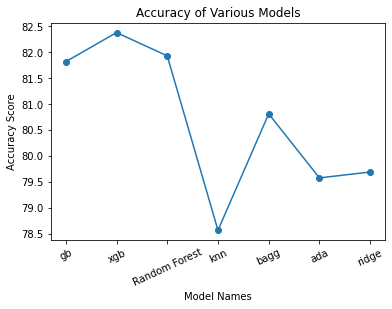

In [54]:
plt.plot(range(1,8), tuned_models['score'], marker='o')
plt.xticks(range(1,8),['gb','xgb','Random Forest','knn','bagg','ada','ridge'],rotation=25)
plt.title('Accuracy of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Accuracy Score")
plt.show()

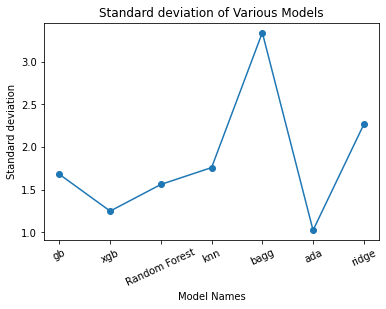

In [55]:
plt.plot(range(1,8), tuned_models['std'], marker='o')
plt.xticks(range(1,8),['gb','xgb','Random Forest','knn','bagg','ada','ridge'],rotation=25)
plt.title('Standard deviation of Various Models')
plt.xlabel('Model Names')
plt.ylabel("Standard deviation")
plt.show()

In [56]:
# All four models
voting_classifier_1 = VotingClassifier(estimators=[('grad_boost', tuned_models['estimator']['gb']), 
                                                 ('rnd_forest', tuned_models['estimator']['rf']),
                                                 ('ridge', tuned_models['estimator']['ridge']),
                                                 ('knn', tuned_models['estimator']['knn']),
                                                 ('xgb', tuned_models['estimator']['xgb']),
                                                 ('bagg', tuned_models['estimator']['bagg']),
                                                 ('ada', tuned_models['estimator']['ada'])],
                                                 voting='hard')
voting_classifier_1.fit(X_full, y_full)

# Without gb
voting_classifier_2 = VotingClassifier(estimators=[('grad_boost', tuned_models['estimator']['gb']), 
                                                 ('rnd_forest', tuned_models['estimator']['rf']),
                                                 ('xgb', tuned_models['estimator']['xgb']),
                                                 ('bagg', tuned_models['estimator']['bagg'])],
                                                 voting='hard')
voting_classifier_2.fit(X_full, y_full)


# Without ada
voting_classifier_3 = VotingClassifier(estimators=[('grad_boost', tuned_models['estimator']['gb']), 
                                                 ('rnd_forest', tuned_models['estimator']['rf']),
                                                 ('knn', tuned_models['estimator']['knn']),
                                                 ('xgb', tuned_models['estimator']['xgb']),
                                                 ('ada', tuned_models['estimator']['ada'])],
                                                 voting='hard')
voting_classifier_3.fit(X_full, y_full)

#new entry
voting_classifier_4 = VotingClassifier(estimators=[('grad_boost', tuned_models['estimator']['gb']), 
                                                 ('rnd_forest', tuned_models['estimator']['rf']),
                                                 ('xgb', tuned_models['estimator']['xgb'])],
                                                 voting='hard')
voting_classifier_4.fit(X_full, y_full)

VotingClassifier(estimators=[('grad_boost',
                              GradientBoostingClassifier(max_depth=2,
                                                         random_state=0)),
                             ('rnd_forest',
                              RandomForestClassifier(max_depth=9,
                                                     max_features='sqrt',
                                                     n_estimators=500,
                                                     random_state=0)),
                             ('xgb',
                              GradientBoostingClassifier(random_state=0,
                                                         subsample=0.5))])

In [57]:
scores = cross_val_score(estimator = voting_classifier_1,
                         X = X_full,
                         y = y_full,
                         cv = 8,
                         n_jobs = -1)

print("1 - score: {:.1f}% +- {:.1f}%".format(np.mean(scores)*100, np.std(scores)*100))

# Without Ridge
scores = cross_val_score(estimator = voting_classifier_2,
                         X = X_full,
                         y = y_full,
                         cv = 8,
                         n_jobs = -1)

print("2 - score: {:.1f}% +- {:.1f}%".format(np.mean(scores)*100, np.std(scores)*100))


# Without Logistic Regression
scores = cross_val_score(estimator = voting_classifier_3,
                         X = X_full,
                         y = y_full,
                         cv = 8,
                         n_jobs = 2)

print("3 - score: {:.1f}% +- {:.1f}%".format(np.mean(scores)*100, np.std(scores)*100))

# Without Logistic Regression
scores = cross_val_score(estimator = voting_classifier_4,
                         X = X_full,
                         y = y_full,
                         cv = 8,
                         n_jobs = 2)

print("4 - score: {:.1f}% +- {:.1f}%".format(np.mean(scores)*100, np.std(scores)*100))

1 - score: 82.7% +- 2.6%
2 - score: 83.4% +- 3.8%
3 - score: 83.1% +- 2.0%
4 - score: 83.5% +- 2.9%


In [58]:
estimators = [voting_classifier_1, voting_classifier_2, voting_classifier_3, voting_classifier_4]
estimator_names = ['1', '2', '3', '4']

for estimator, name in zip(estimators, estimator_names):
    print(name + ' - recall_score: {:.1f}%'.format(100*recall_score(y_true=y_full, y_pred=estimator.predict(X_full))))

1 - recall_score: 81.3%
2 - recall_score: 81.9%
3 - recall_score: 81.0%
4 - recall_score: 81.9%


In [59]:
PassengerId = test['PassengerId']

In [60]:
2+2

4

In [61]:
y_final = voting_classifier_4.predict(test_norm)

test_survived = pd.Series(y_final, name="Survived")

results = pd.concat([PassengerId,test_survived],axis=1)

results.to_csv('fifth_kj_sub.csv', index=False)
2+2

4

In [62]:
#Survived = test_df['Survived']
#PassengerId = test['PassengerId']
#titanic_submission = pd.concat([PassengerId, Survived], axis=1)
#titanic_submission.head()

In [63]:
#titanic_submission1 = pd.DataFrame({'PassengerId': PassengerId, 'Survived': Survived})
#titanic_submission1.to_csv('first_kj_sub.csv', index=False)